In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
%matplotlib inline

In [ ]:
dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset.xlsx")]

In [ ]:
dataset.shape

(4286, 10)

In [ ]:
dataset.head(10)

,Medication,Acidious,Cold,Cough,Temperature,Heart Rate,Pulse,Respiratory Rate,SPO2,Target
0,0,0,0,0,98,93,67,12,0.994164,0
1,0,1,0,1,98,185,160,47,0.913976,2
2,1,1,0,1,103,126,194,42,0.932465,1
3,0,0,0,0,98,92,69,16,0.999605,0
4,1,1,0,1,105,197,115,39,0.971081,1
5,0,0,1,1,95,64,82,42,0.929614,1
6,1,0,0,0,98,68,67,15,0.999340,0
7,1,0,1,1,103,184,163,48,0.924579,1
8,1,0,1,0,106,147,133,53,0.951885,2
9,1,0,1,0,95,59,143,18,0.914973,1


In [ ]:
dataset.describe()

,Medication,Acidious,Cold,Cough,Temperature,Heart Rate,Pulse,Respiratory Rate,SPO2,Target
count,4286.000000,4286.000000,4286.000000,4286.00000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000
mean,0.500233,0.491834,0.478768,0.50280,100.167989,115.208586,113.360243,28.911573,0.950482,1.122025
std,0.500058,0.499992,0.499607,0.50005,3.203449,43.326482,46.123845,16.211535,0.030227,0.706228
min,0.000000,0.000000,0.000000,0.00000,95.000000,50.000000,50.000000,6.000000,0.900010,0.000000
25%,0.000000,0.000000,0.000000,0.00000,98.000000,77.000000,67.000000,14.000000,0.924190,1.000000
50%,1.000000,0.000000,0.000000,1.00000,99.000000,106.000000,108.000000,25.500000,0.949038,1.000000
75%,1.000000,1.000000,1.000000,1.00000,103.000000,152.000000,155.000000,43.000000,0.974621,2.000000
max,1.000000,1.000000,1.000000,1.00000,106.000000,200.000000,200.000000,60.000000,0.999997,2.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Medication        4286 non-null   int64  
 1   Acidious          4286 non-null   int64  
 2   Cold              4286 non-null   int64  
 3   Cough             4286 non-null   int64  
 4   Temperature       4286 non-null   int64  
 5   Heart Rate        4286 non-null   int64  
 6   Pulse             4286 non-null   int64  
 7   Respiratory Rate  4286 non-null   int64  
 8   SPO2              4286 non-null   float64
 9   Target            4286 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 335.0 KB


In [ ]:
dataset['Target'].unique()

array([0, 2, 1])

In [ ]:
print(dataset.corr()["Target"].abs().sort_values(ascending=False))

Target              1.000000
SPO2                0.581142
Pulse               0.427410
Respiratory Rate    0.355392
Heart Rate          0.315617
Temperature         0.215813
Medication          0.117215
Cough               0.110382
Acidious            0.102950
Cold                0.087045
Name: Target, dtype: float64


1    2085
2    1362
0     839
Name: Target, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


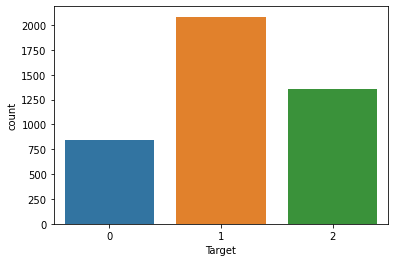

In [ ]:
y = dataset["Target"]

sns.countplot(y)


target_temp = dataset.Target.value_counts()

print(target_temp)

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("Target",axis=1)
target = dataset["Target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.35,random_state = 11)
print(X_test)

      Medication  Acidious  Cold   Cough  Temperature  Heart Rate  Pulse  \
829            0         1      1      1          102         116     74   
2699           1         1      0      0           96         115    165   
1182           0         0      1      1           99          67     88   
3376           0         1      1      0           98         183     80   
3241           0         1      0      0           98          62     62   
...          ...       ...    ...    ...          ...         ...    ...   
250            1         0      0      1           99         170    163   
1446           0         0      1      0          100          77    172   
3342           1         1      0      0          104          68    126   
1042           1         1      1      1           98         156     73   
1643           1         1      0      1           96          59    174   

      Respiratory Rate      SPO2  
829                 35  0.918343  
2699             

In [ ]:
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

In [ ]:
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=150)

Epoch 1/150
88/88 [==============================] - 3s 3ms/step - loss: 12.6259 - accuracy: 0.4032
Epoch 2/150
88/88 [==============================] - 0s 2ms/step - loss: 3.2266 - accuracy: 0.4151
Epoch 3/150
88/88 [==============================] - 0s 2ms/step - loss: 1.7008 - accuracy: 0.4481
Epoch 4/150
88/88 [==============================] - 0s 2ms/step - loss: 1.2530 - accuracy: 0.5246
Epoch 5/150
88/88 [==============================] - 0s 2ms/step - loss: 1.0298 - accuracy: 0.5770
Epoch 6/150
88/88 [==============================] - 0s 2ms/step - loss: 0.9035 - accuracy: 0.6093
Epoch 7/150
88/88 [==============================] - 0s 2ms/step - loss: 0.7525 - accuracy: 0.6682
Epoch 8/150
88/88 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6973
Epoch 9/150
88/88 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.7185
Epoch 10/150
88/88 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.7278
Epoch 11

In [ ]:
Y_pred_nn = model.predict(X_test)
Y_pred_nn.shape
print(Y_pred_nn)
print(Y_test)

47/47 [==============================] - 0s 1ms/step
[[2.4916236e-10 9.8210955e-01 1.7890500e-02]
 [5.9893012e-25 3.8524798e-01 6.1475205e-01]
 [5.2449686e-06 5.2478838e-01 4.7520632e-01]
 ...
 [8.0224947e-09 3.1608346e-01 6.8391657e-01]
 [1.1091166e-23 9.9979669e-01 2.0331585e-04]
 [1.3706009e-22 9.7384971e-01 2.6150275e-02]]
829     1
2699    2
1182    1
3376    2
3241    0
       ..
250     1
1446    2
3342    1
1042    1
1643    1
Name: Target, Length: 1501, dtype: int64


In [ ]:
# rounded = [round(x[0]) for x in Y_pred_nn]

# Y_pred_nn = rounded
Y_p = np.argmax(Y_pred_nn, axis = 1 )
# for i in Y_p:
#   print(i)

In [ ]:
score_nn = round(accuracy_score(Y_p,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 81.41 %


In [ ]:
print(Y_pred_nn)
# print(Y_test)

[[2.4916236e-10 9.8210955e-01 1.7890500e-02]
 [5.9893012e-25 3.8524798e-01 6.1475205e-01]
 [5.2449686e-06 5.2478838e-01 4.7520632e-01]
 ...
 [8.0224947e-09 3.1608346e-01 6.8391657e-01]
 [1.1091166e-23 9.9979669e-01 2.0331585e-04]
 [1.3706009e-22 9.7384971e-01 2.6150275e-02]]


In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('Apna_Model.h5')

In [ ]:
arr = np.array([[1,1,0,1,103,126,194,42,0.932465334832015]])
d = model.predict(arr)
a = np.argmax(d , axis = 1 )

1/1 [==============================] - 0s 46ms/step


In [ ]:
print(a)

[1]
